In [25]:
import pandas

In [26]:
df = pandas.read_csv("elections-presidentielles-2017-1ertour.csv",  sep =';')

In [27]:
print(df)

    ID_BVOTE         SCRUTIN  ANNEE  TOUR        DATE  NUM_CIRC  NUM_QUARTIER  \
0      15-49  Présidentielle   2017     1  2007-04-23        13            57   
1      15-51  Présidentielle   2017     1  2007-04-23        13            57   
2      15-77  Présidentielle   2017     1  2007-04-23        13            58   
3      16-42  Présidentielle   2017     1  2007-04-23        14            63   
4      16-55  Présidentielle   2017     1  2007-04-23         4            64   
..       ...             ...    ...   ...         ...       ...           ...   
891    18-64  Présidentielle   2017     1  2007-04-23        17            72   
892    18-67  Présidentielle   2017     1  2007-04-23         3            69   
893    19-24  Présidentielle   2017     1  2007-04-23        16            75   
894    20-21  Présidentielle   2017     1  2007-04-23        15            78   
895    20-33  Présidentielle   2017     1  2007-04-23        15            77   

     NUM_ARROND  NUM_BUREAU

In [28]:
df.columns

Index(['ID_BVOTE', 'SCRUTIN', 'ANNEE', 'TOUR', 'DATE', 'NUM_CIRC',
       'NUM_QUARTIER', 'NUM_ARROND', 'NUM_BUREAU', 'NB_PROCU', 'NB_INSCR',
       'NB_EMARG', 'NB_VOTANT', 'NB_BL', 'NB_NUL', 'NB.EXPRIM',
       'DUPONT-AIGNAN Nicolas', 'LE PEN Marine', 'MACRON Emmanuel',
       'HAMON Benoît', 'ARTHAUD Nathalie', 'POUTOU Philippe',
       'CHEMINADE Jacques', 'LASSALLE Jean', 'MÉLENCHON Jean-Luc',
       'ASSELINEAU François', 'FILLON François', 'geo_shape', 'geo_point_2d'],
      dtype='object')

1. Extraire le nombre de voix pour le candidat Jean-Luc MÉLENCHON



In [29]:
melenchon_voix_total = df["MÉLENCHON Jean-Luc"].sum()
melenchon_voix_total


210548

2. Représenter sous forme d'histogramme le nombre de voix obtenues par Jean-Luc MÉLENCHON.



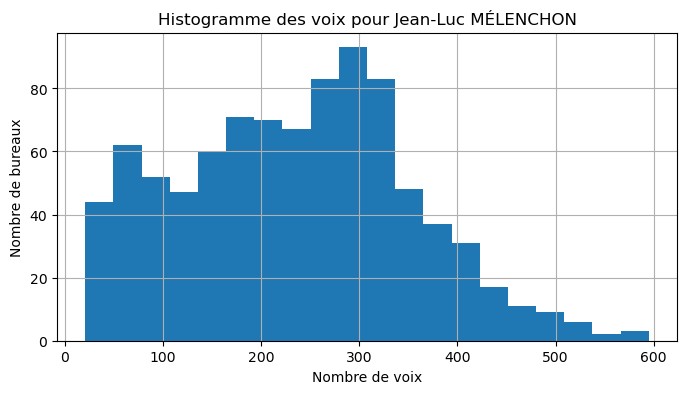

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(df["MÉLENCHON Jean-Luc"], bins=20)
plt.title("Histogramme des voix pour Jean-Luc MÉLENCHON")
plt.xlabel("Nombre de voix")
plt.ylabel("Nombre de bureaux")
plt.grid(True)
plt.show()


3. Compter le nombre de bureaux de vote par arrondissement.



In [31]:
bureaux_par_arr = df[["NUM_ARROND", "NUM_BUREAU"]].drop_duplicates()
bureaux_par_arr.groupby("NUM_ARROND")["NUM_BUREAU"].count()


NUM_ARROND
1     10
2     10
3     15
4     14
5     25
6     22
7     25
8     18
9     27
10    39
11    55
12    64
13    71
14    57
15    95
16    68
17    67
18    68
19    70
20    76
Name: NUM_BUREAU, dtype: int64

4. Extraire le nombre de voix obtenues par Benoît Hamon dans chaque bureau de vote.


In [32]:
hamon_bv = df[["NUM_BUREAU", "HAMON Benoît"]]
hamon_bv


,NUM_BUREAU,HAMON Benoît
0,49,107
1,51,126
2,77,90
3,42,29
4,55,27
...,...,...
891,64,145
892,67,163
893,24,129
894,21,125



5. Extraire le nombre de voix obtenues par chaque candidat et par arrondissement.


In [33]:
voix_par_arr = df.groupby("NUM_ARROND")[[
    'DUPONT-AIGNAN Nicolas', 'LE PEN Marine', 'MACRON Emmanuel',
    'HAMON Benoît', 'ARTHAUD Nathalie', 'POUTOU Philippe',
    'CHEMINADE Jacques', 'LASSALLE Jean', 'MÉLENCHON Jean-Luc',
    'ASSELINEAU François', 'FILLON François'
]].sum()



In [34]:
voix_par_arr


,DUPONT-AIGNAN Nicolas,LE PEN Marine,MACRON Emmanuel,HAMON Benoît,ARTHAUD Nathalie,POUTOU Philippe,CHEMINADE Jacques,LASSALLE Jean,MÉLENCHON Jean-Luc,ASSELINEAU François,FILLON François
NUM_ARROND,,,,,,,,,,,
1,128,443,3561,659,15,32,11,57,1231,58,2831
2,128,399,5013,1099,17,49,17,46,1802,81,2640
3,183,615,8325,1963,47,92,15,73,3078,100,3994
4,214,735,6182,1370,36,82,23,83,2329,96,3956
5,459,1225,12316,3103,63,170,39,178,4960,222,8273
6,268,719,8729,1419,28,76,26,134,2038,126,8769
7,324,1064,8785,1068,29,75,23,126,1552,102,14650
8,241,916,6568,849,23,54,17,83,1392,107,10448
9,390,1092,14029,3163,61,154,31,150,4783,208,8879



6. Représenter sous forme de camembert, de barres le nombre de voix des 4 candidats 'LE PEN Marine', 'MACRON Emmanuel','MÉLENCHON Jean-Luc', 'FILLON François', par arrondissement. Quelle représentation vous semble être la plus adaptée?


In [35]:
top4 = ['LE PEN Marine', 'MACRON Emmanuel', 'MÉLENCHON Jean-Luc', 'FILLON François']
df_top4 = df[["NUM_ARROND"] + top4]


Barres : voix par arrondissement

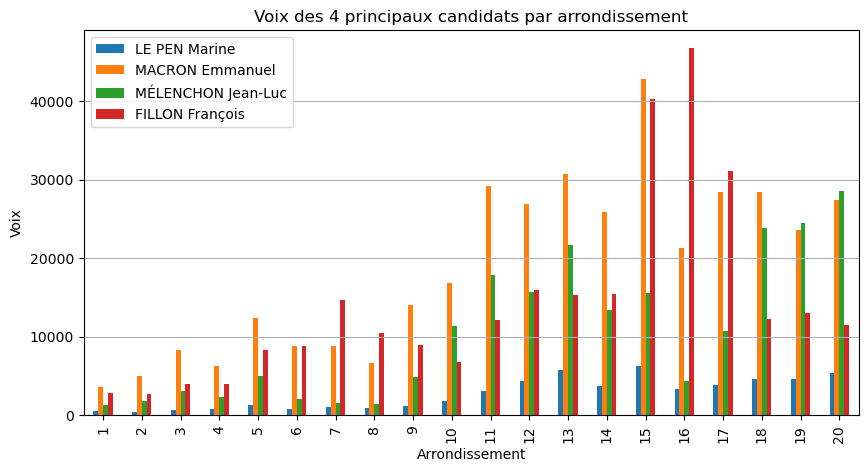

In [36]:
pivot_top4 = df_top4.groupby("NUM_ARROND")[top4].sum()

pivot_top4.plot(kind="bar", figsize=(10,5))
plt.title("Voix des 4 principaux candidats par arrondissement")
plt.xlabel("Arrondissement")
plt.ylabel("Voix")
plt.grid(axis="y")
plt.show()


Camembert : pour un arrondissement précis (exemple : 1er)

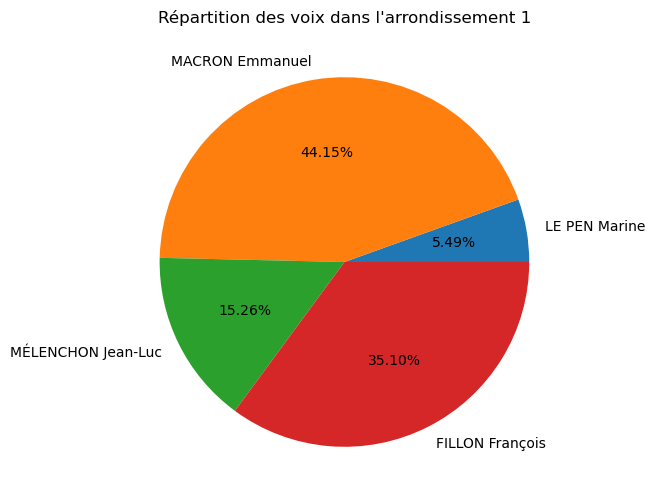

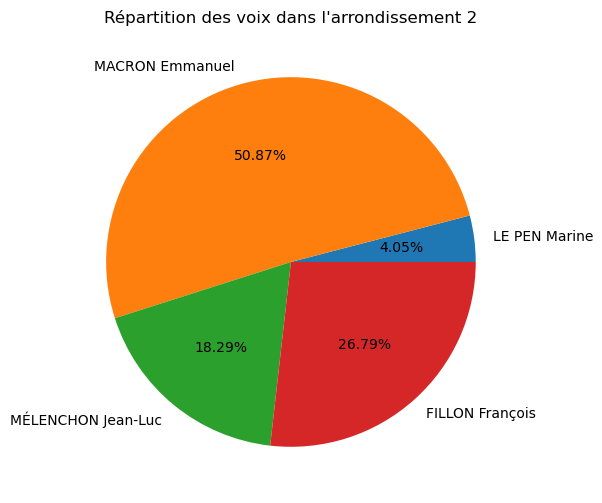

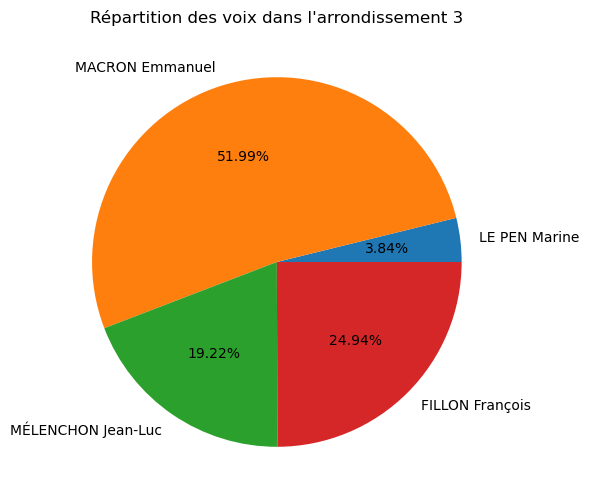

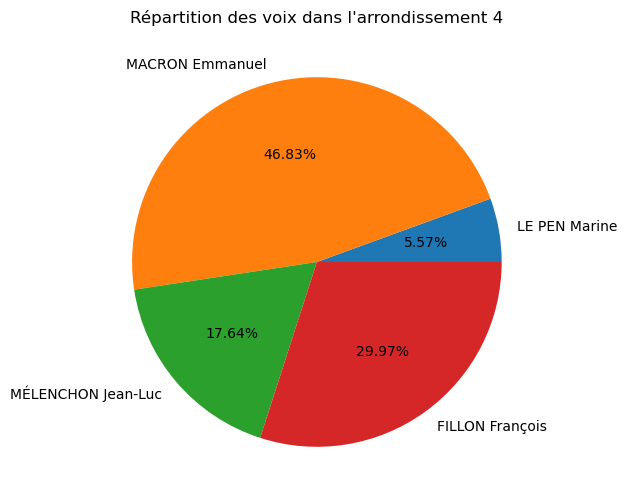

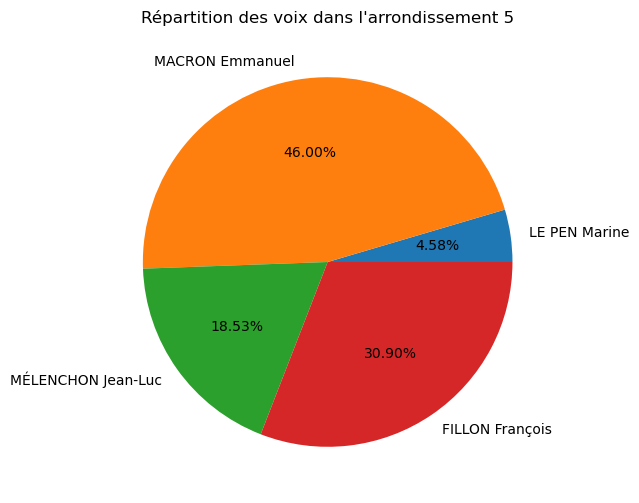

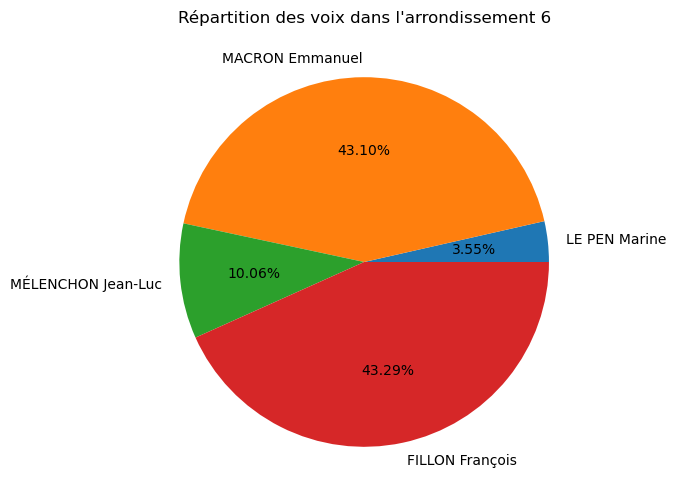

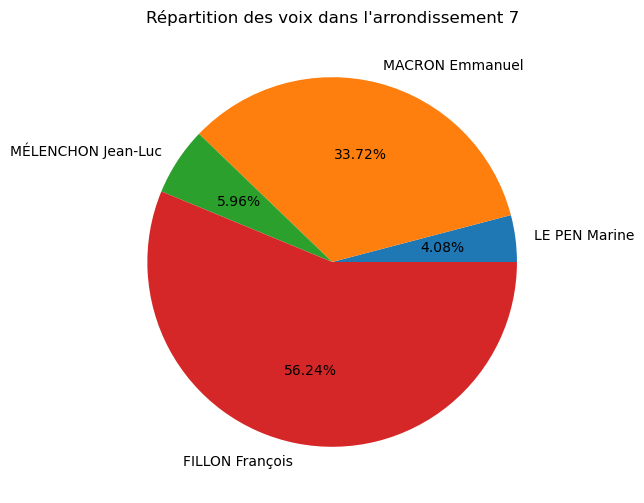

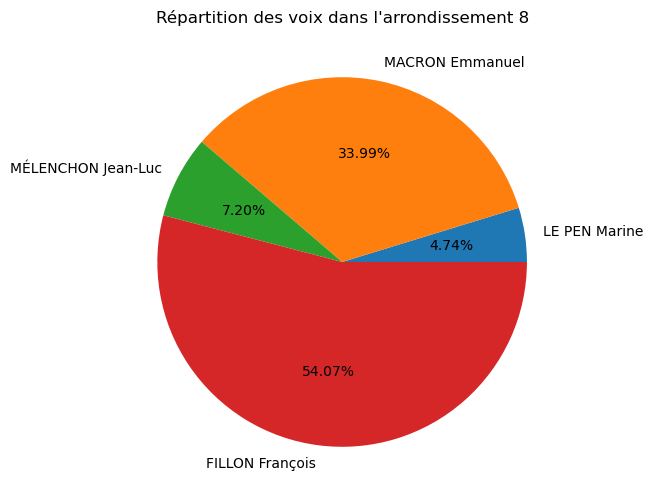

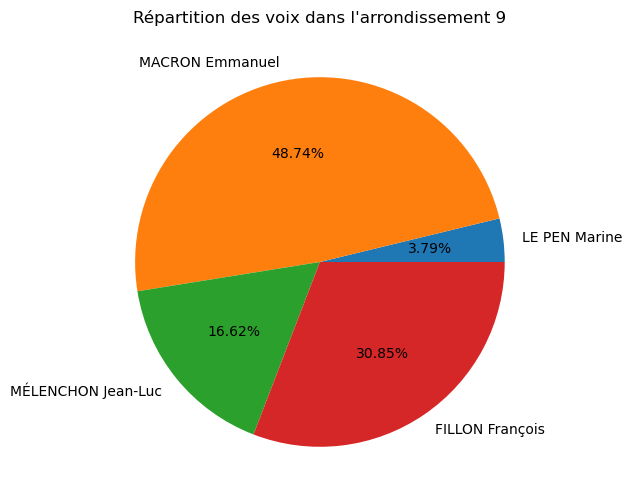

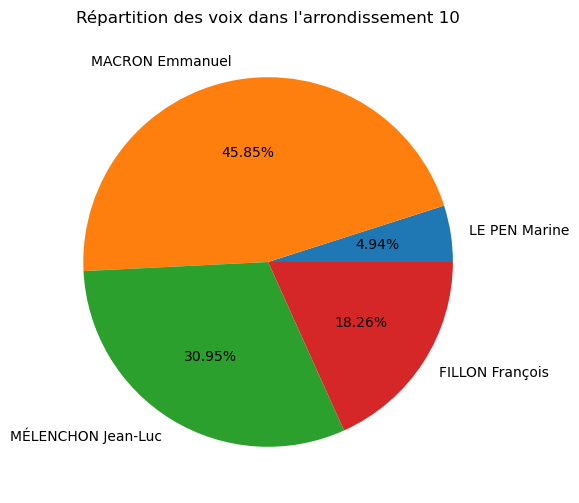

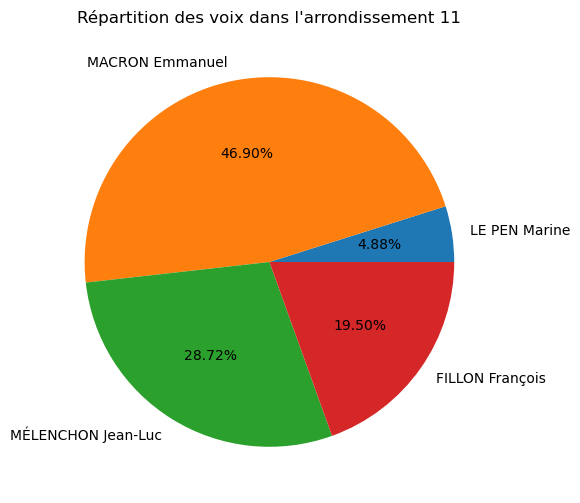

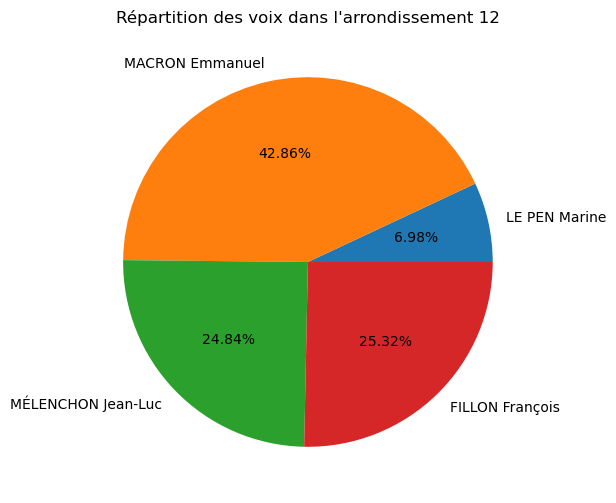

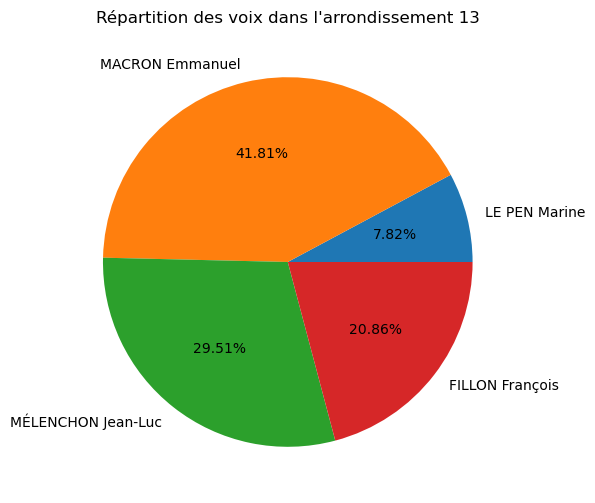

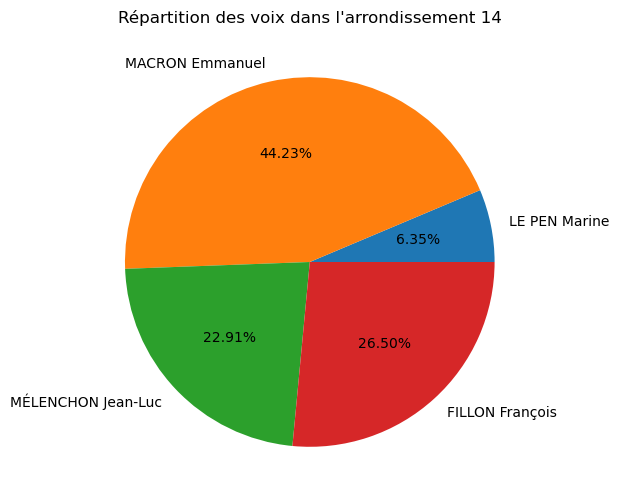

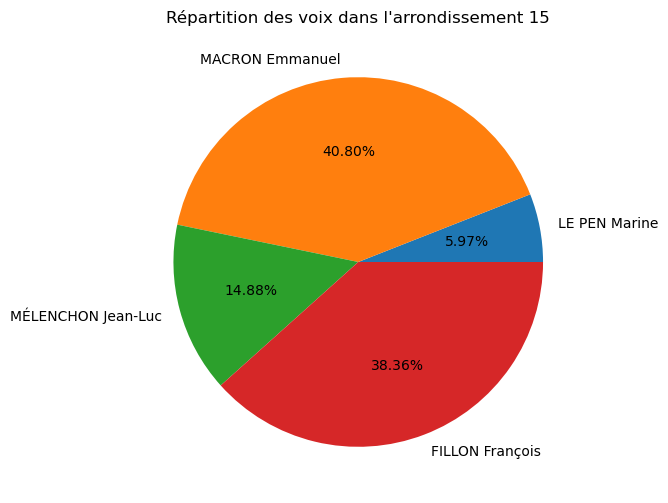

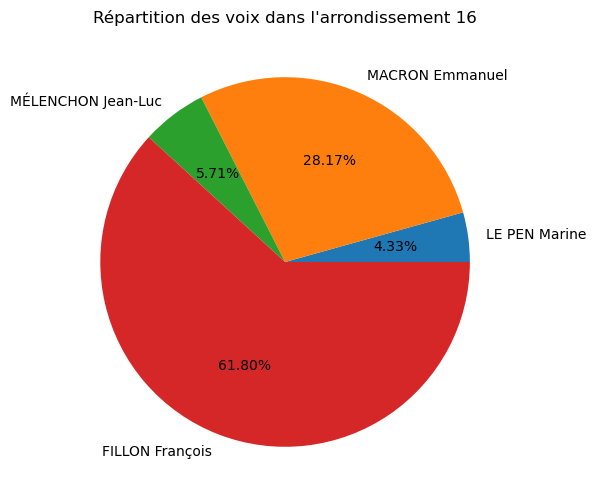

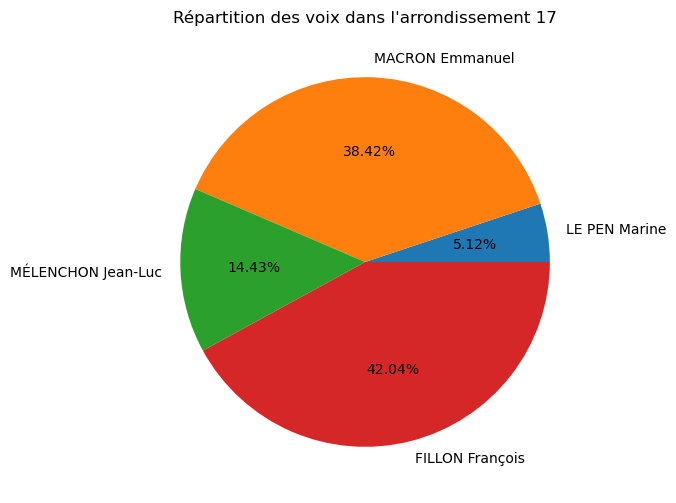

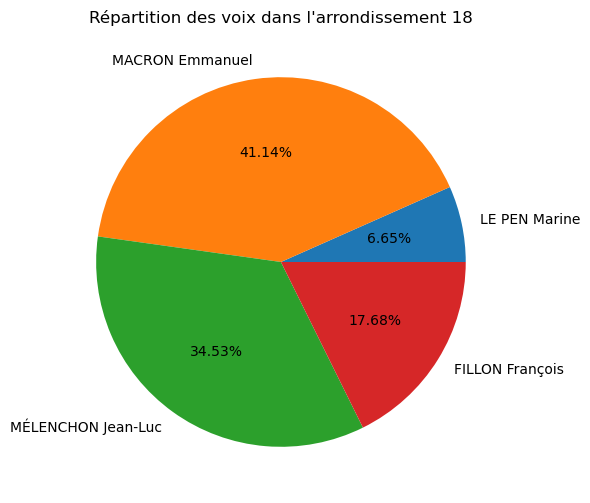

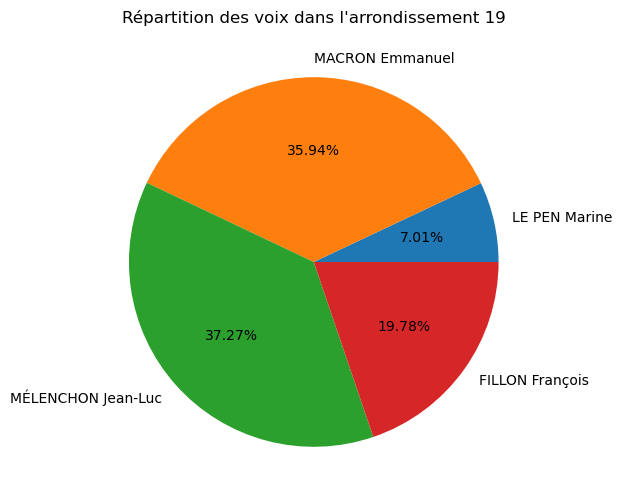

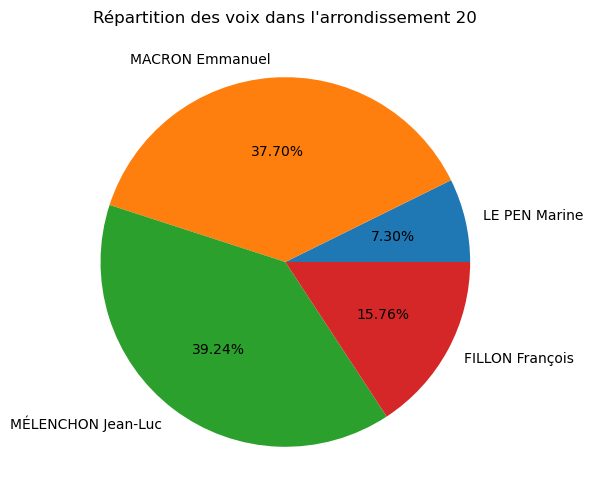

In [40]:
for i in range(1,21):
   arr = i
   data_arr = df[df["NUM_ARROND"] == arr][top4].sum()

   plt.figure(figsize=(6,6))
   plt.pie(data_arr, labels=data_arr.index, autopct="%1.2f%%")
   plt.title(f"Répartition des voix dans l'arrondissement {arr}")
   plt.show()


Quelle représentation est la plus adaptée ?


Le camembert montre la répartition entre les candidats d’un seul arrondissement → utile pour comparer les parts.
Le diagramme en barres permet de comparer plusieurs arrondissements → beaucoup plus informatif globalement.
Donc :La représentation en barres est la plus adaptée pour ce type de données.


7. Représenter sous forme graphique d'autres données extraites de ce tableau. Vous choisirez celles qui vous paraissent représentatives.


Participation par arrondissement

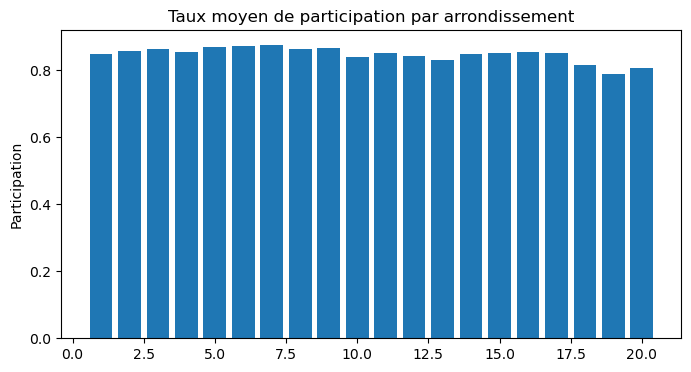

In [38]:
df_part = df[["NUM_ARROND", "NUM_BUREAU", "NB_INSCR", "NB_VOTANT"]].drop_duplicates()
df_part["Participation"] = df_part["NB_VOTANT"] / df_part["NB_INSCR"]

part_arr = df_part.groupby("NUM_ARROND")["Participation"].mean()

plt.figure(figsize=(8,4))
plt.bar(part_arr.index, part_arr.values)
plt.title("Taux moyen de participation par arrondissement")
plt.ylabel("Participation")
plt.show()


Comparaison MÉLENCHON / MACRON / LE PEN par arrondissement

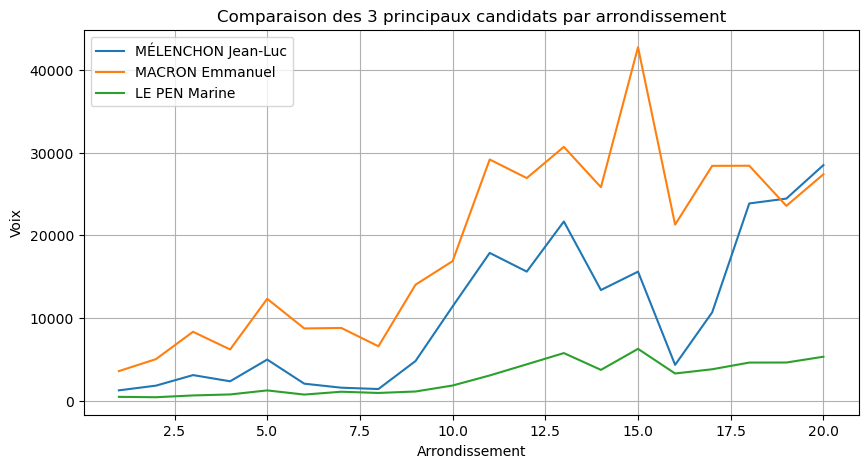

In [39]:
df_compare = df.groupby("NUM_ARROND")[["MÉLENCHON Jean-Luc", "MACRON Emmanuel", "LE PEN Marine"]].sum()

df_compare.plot(figsize=(10,5))
plt.title("Comparaison des 3 principaux candidats par arrondissement")
plt.xlabel("Arrondissement")
plt.ylabel("Voix")
plt.grid(True)
plt.show()
